src: dictionaries of abbreviations and emojis were taken from: 
https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing and
https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners/notebook
https://www.kaggle.com/code/kritanjalijain/twitter-sentiment-analysis-lstm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file1 = '/kaggle/input/twitter-dataset/train_pos_full.txt'
file2 = '/kaggle/input/twitter-dataset/train_neg_full.txt'

df = pd.read_fwf(file1)
df.to_csv('train_pos.csv', index=False)

df = pd.read_fwf(file2)
df.to_csv('train_neg.csv', index=False)

In [4]:
import csv

with open('train_neg.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

data.insert(0, ['label', 'tweet'])

for i, row in enumerate(data[1:], start=1):  
    row.insert(0, '-1')  # Insert label at the beginning of the row

# Write to a new CSV file with headers
with open('train_neg_merged.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

with open('train_pos.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

data.insert(0, ['label', 'tweet'])  # Same assumption as above

for i, row in enumerate(data[1:], start=1):  # Start at 1 to skip header
    row.insert(0, '1')  # Insert label at the beginning of the row

with open('train_pos_merged.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [5]:
df1 = pd.read_csv('train_neg_merged.csv')
df2 = pd.read_csv('train_pos_merged.csv')

combined_tweets = pd.concat([df1, df2], ignore_index=True)

combined_tweets.to_csv('train_data.csv', index=False)
train  = pd.read_csv('train_data.csv')
train[train['label'] == -1].head(10)

,label,tweet
0,-1,vinco tresorpack 6 ( difficulty 10 of 10 objec...
1,-1,glad i dot have taks tomorrow ! ! #thankful #s...
2,-1,1-3 vs celtics in the regular season = were fu...
3,-1,<user> i could actually kill that girl i'm so ...
4,-1,<user> <user> <user> i find that very hard to ...
5,-1,wish i could be out all night tonight ! <user>
6,-1,<user> i got kicked out the wgm
7,-1,rt <user> <user> <user> yes she is ! u tell it...
8,-1,why is she so perfect <url>
9,-1,<user> hi harry ! did u havea good time in aus...


In [6]:
train["label"].value_counts()


label
-1    1250000
 1    1250000
Name: count, dtype: int64

# Negative vs Positive training data

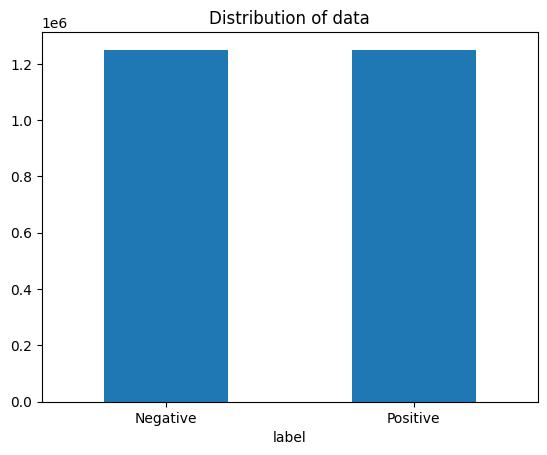

In [7]:


# Plotting the distribution for dataset.
ax = train.groupby('label').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(train['tweet']), list(train['label'])

# Length of tweets in training data

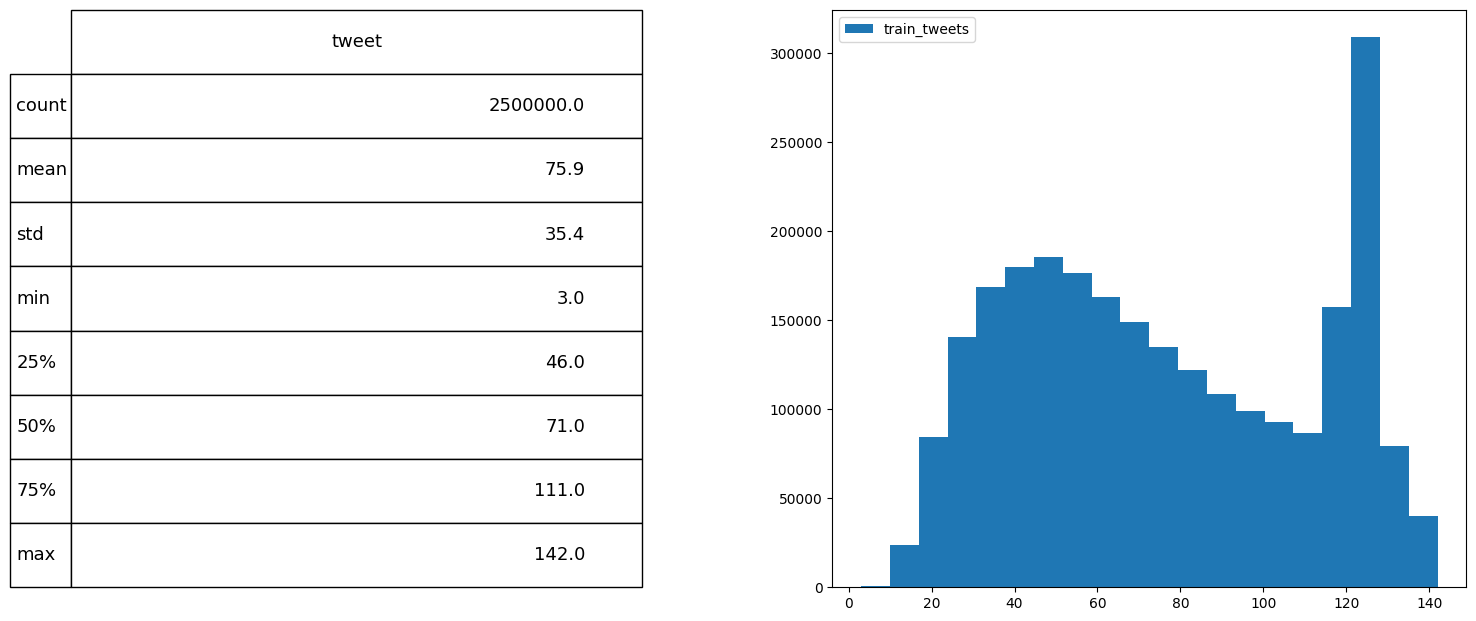

In [8]:
length_train = train['tweet'].str.len()
fig = plt.figure(figsize=(18,7.5))

ax1 = fig.add_subplot(122)
plt.hist(length_train, bins=20, label="train_tweets")
plt.legend()

describe = length_train.describe().to_frame().round(1)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 13
table = ax2.table(cellText = describe.values, bbox=[0, 0, 0.9, 1], rowLabels = describe.index, colLabels=describe.columns)
table.set_fontsize(font_size)

plt.show()

**ONLY POSITIVE LENGTH**

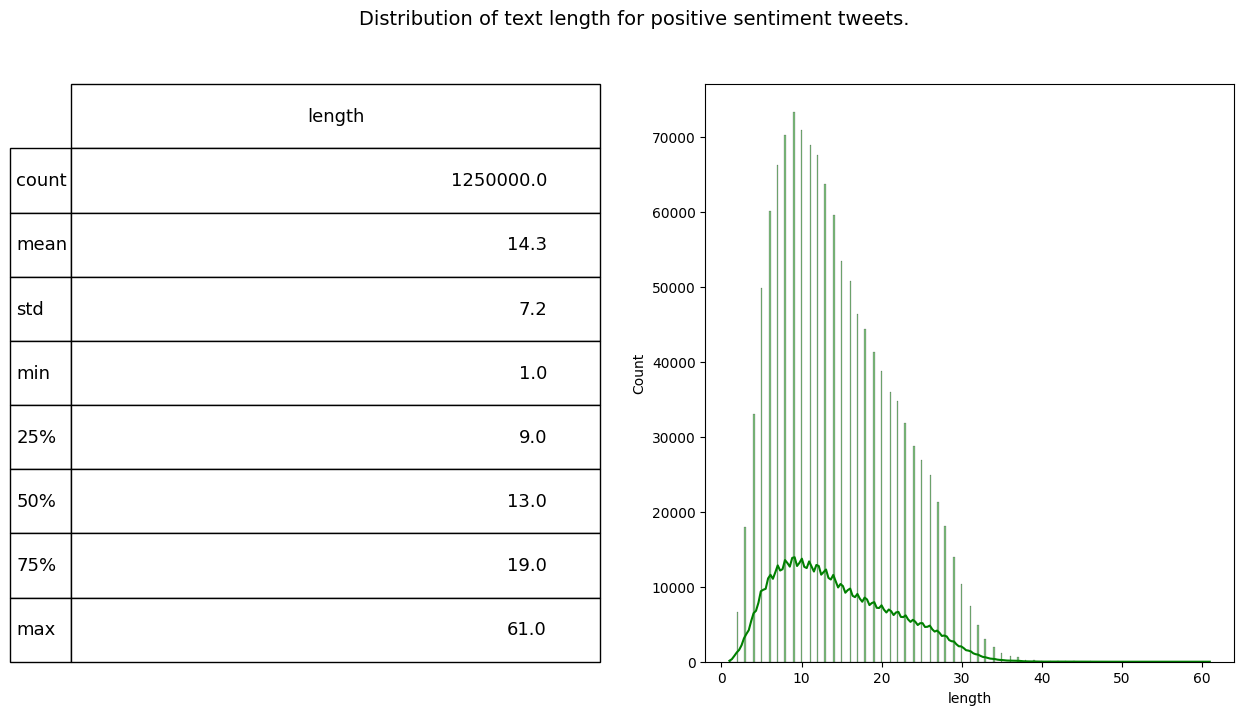

In [9]:
train['length'] = train.tweet.str.split().apply(len)
fig = plt.figure(figsize=(15,7.5))

ax1 = fig.add_subplot(122)
sns.histplot(train[train['label']==1]['length'], kde=True, color='green')
describe = train.length[train.label==1].describe().to_frame().round(1)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 13
table = ax2.table(cellText = describe.values, bbox=[0, 0, 1, 1], rowLabels = describe.index, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=14)

plt.show()

**ONLY NEGATIVE LENGTH**

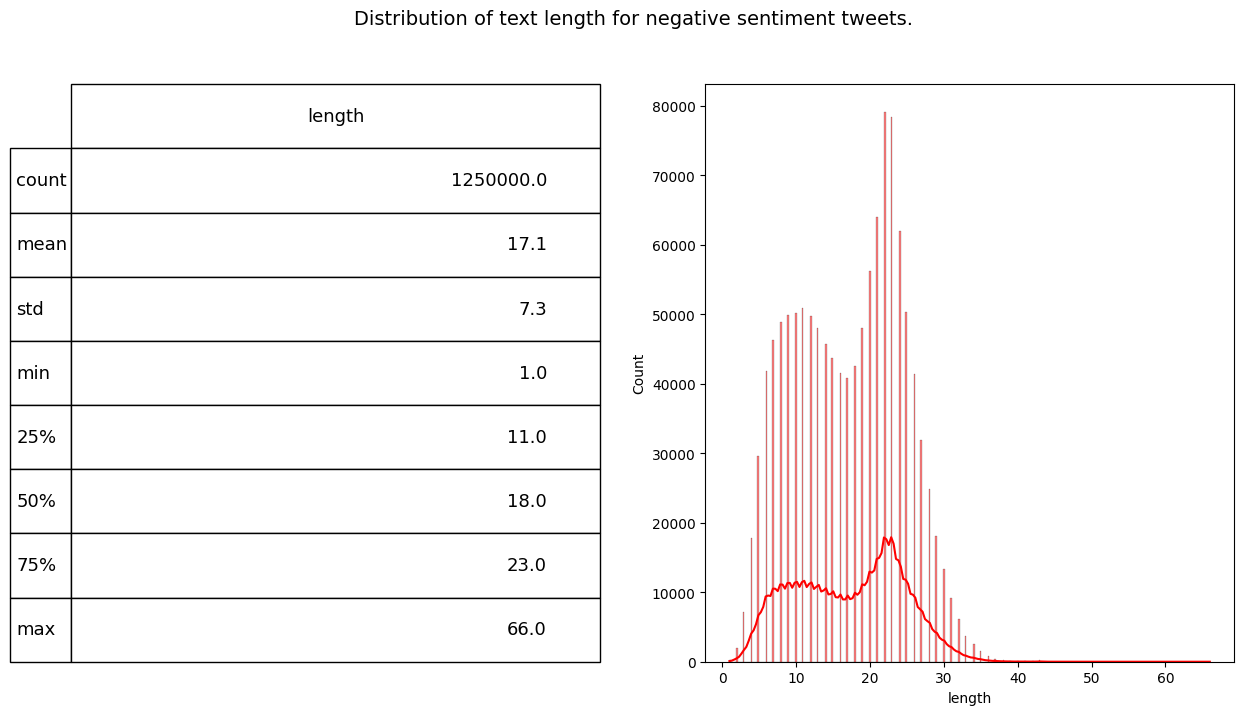

In [10]:
fig = plt.figure(figsize=(15,7.5))

ax1 = fig.add_subplot(122)
sns.histplot(train[train['label']==-1]['length'], color='red',kde=True)
describe = train.length[train.label==-1].describe().to_frame().round(1)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 13
table = ax2.table(cellText = describe.values, bbox=[0, 0, 1, 1], rowLabels = describe.index, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=14)

plt.show()

# HASHTAGS

In [11]:
hashTags=[]
counter=0
tweets_with_hashtag=0
for tweet in train['tweet']:
    if counter>1249999: indic=1 
    else: indic=-1
    counter=counter+1
    temp=[x for x in tweet.split(' ') if x.startswith('#')]
    if len(temp)>0: tweets_with_hashtag=tweets_with_hashtag+1
    for i in temp:
        hashTags.append((i,indic))

positive_hash=[]
negative_hash=[]
for (i,j) in hashTags:
    if j==1:
        positive_hash.append(i)
    else: negative_hash.append(i)

<BarContainer object of 2 artists>

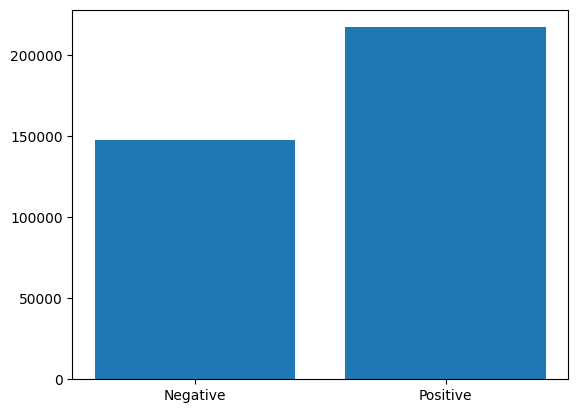

In [12]:
hash_num=[len(negative_hash), len(positive_hash)]
hash_num_unique=[len(set(negative_hash)), len(set(positive_hash))]
plt.bar(['Negative','Positive'], hash_num)

**HOW MANY TWEETS HAVE HASHTAGS?**

([<matplotlib.patches.Wedge at 0x7fad859bb9a0>,
 [Text(1.0254679052035698, 0.3980145416908817, 'With Hashtag'),
  Text(-1.0254679052035698, -0.3980145416908817, 'Without Hashtag')],
 [Text(0.46612177509253166, 0.18091570076858257, '11.8%'),
  Text(-0.46612177509253166, -0.18091570076858257, '88.2%')])

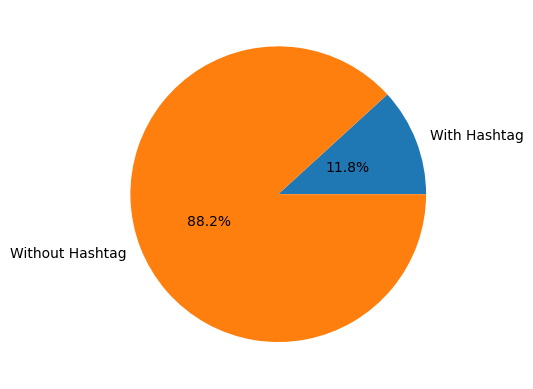

In [13]:
labels = 'With Hashtag', 'Without Hashtag'
sizes = [tweets_with_hashtag, 2500000-tweets_with_hashtag]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',pctdistance=0.5)

**MOST FREQUENT NEGATIVE HASHTAGS**

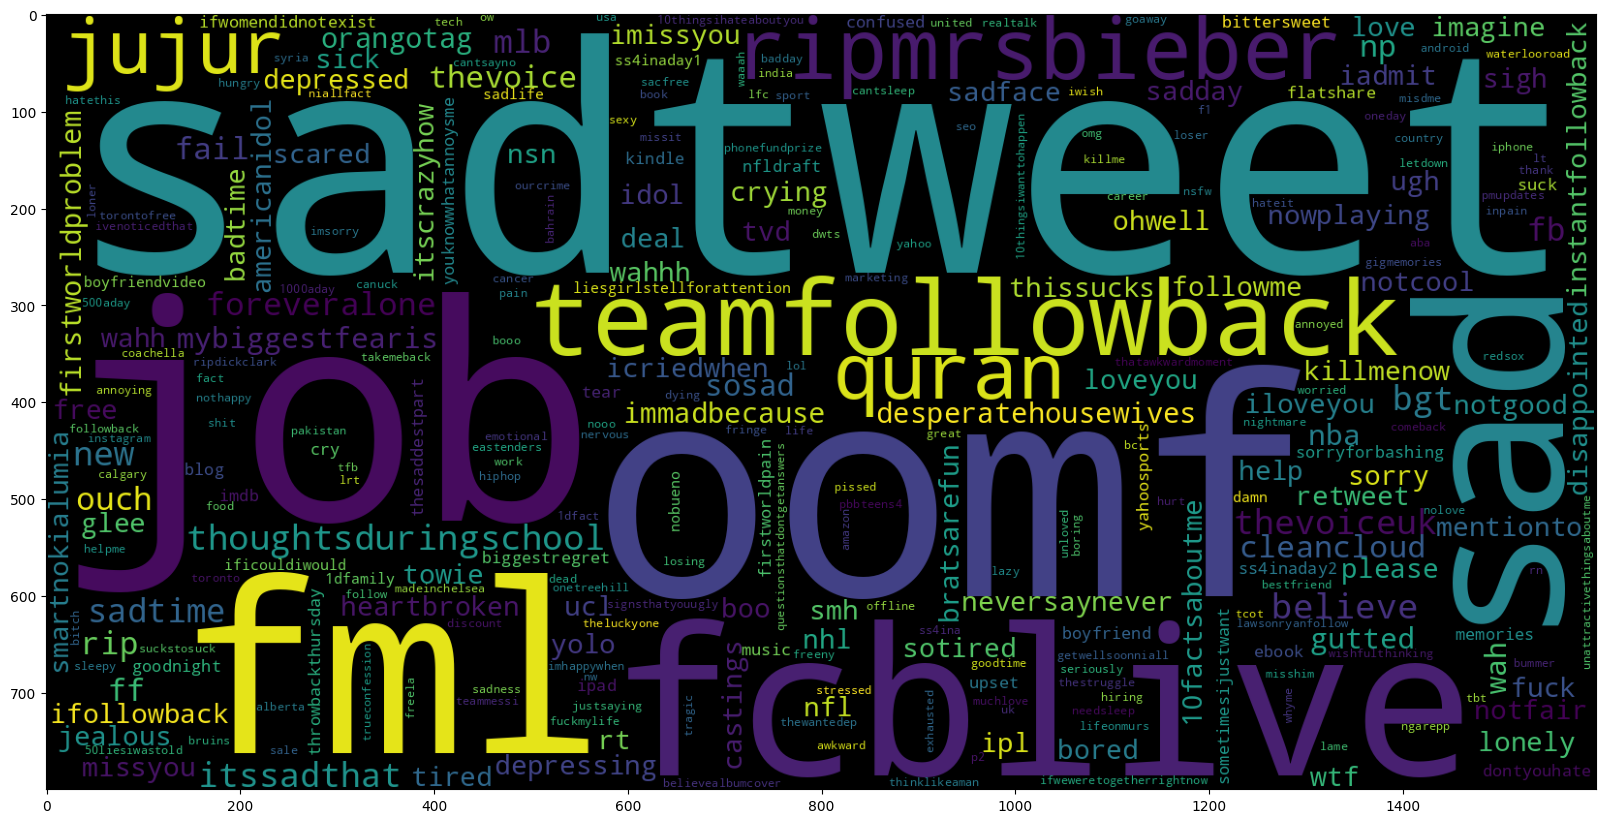

In [14]:
data_pos = negative_hash
wc = WordCloud(max_words = 300 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)


**MOST FREQUENT POSITIVE HASHTAGS**

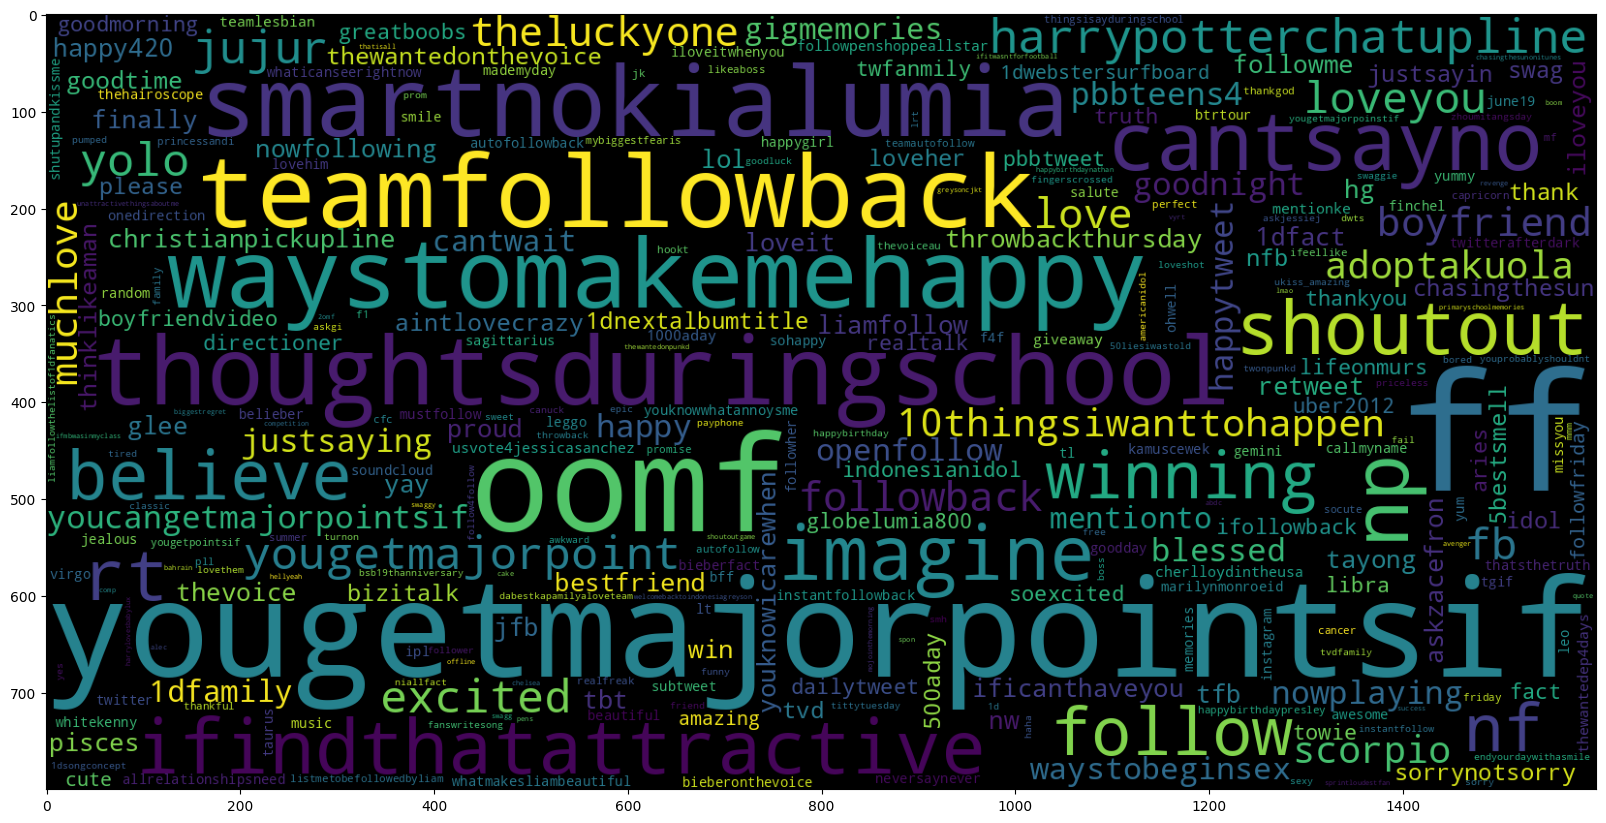

In [15]:
data_pos = positive_hash
wc = WordCloud(max_words = 300 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# EMOJIS

**FRACTION OF TWEETS WITH EMOJIS**

([<matplotlib.patches.Wedge at 0x7fad858a36d0>,
 [Text(1.0999942053019935, 0.003570476443848534, 'With EMOJI'),
  Text(-1.0999942051557396, -0.0035705215014878097, 'Without EMOJI')],
 [Text(0.49999736604636064, 0.0016229438381129698, '0.1%'),
  Text(-0.49999736597988165, -0.0016229643188580953, '99.9%')])

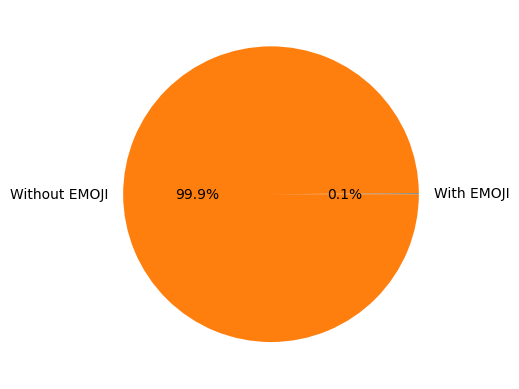

In [16]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'silly', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

counter_emoji=0
for tweet in train['tweet']:
    for emoji in emojis.keys():
        if emoji in tweet: counter_emoji=counter_emoji+1


labels = 'With EMOJI', 'Without EMOJI'
sizes = [counter_emoji, 2500000-counter_emoji]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',pctdistance=0.5)
        

# Abbreviations

In [17]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

counter=0
for tweet in train['tweet']:
    for abbr in abbreviations.keys():
        if abbr in tweet.split(): counter=counter+1




**FRACTION OF TWEETS WITH ABBREVIATIONS**

([<matplotlib.patches.Wedge at 0x7fad8501cfd0>,
 [Text(0.8889126667989085, 0.5588687420177055, 'With abbreviations'),
  Text(-0.8889127191239725, -0.5588686587916928, 'Without abbreviations')],
 [Text(0.4232917460947183, 0.26612797238938357, '17.9%'),
  Text(-0.42329177101141546, -0.26612793275794894, '82.1%')])

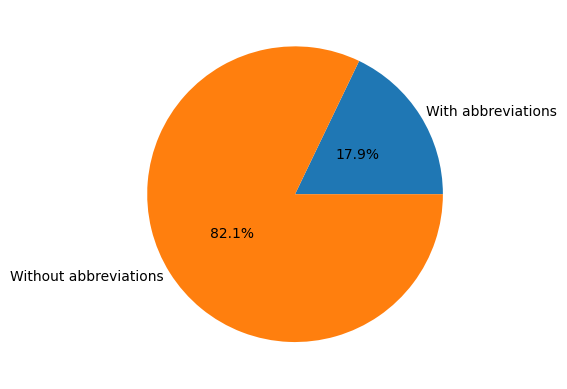

In [18]:
labels = 'With abbreviations', 'Without abbreviations'
sizes = [counter, 2500000-counter]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',labeldistance=1.05, pctdistance=0.5,)